# This Notebook explores the SCAR GeoMAP dataset released in 2019
## Cox S.C., Smith Lyttle B. and the GeoMAP team (2019). Lower Hutt, New Zealand. GNS Science. Release v.201907.
### [Data Available Here](https://data.gns.cri.nz/ata_geomap/index.html?content=/mapservice/Content/antarctica/www/index.html)

### Notebook by Sam Elkind

### Configure packages, paths, and load data

In [1]:
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import pprint as pp
from tabulate import tabulate

In [2]:
def plot_value_counts(field_name, values_to_plot, counts, counts_norm):
    fig, ax = plt.subplots(2, 1, figsize=(30,15))
    fig.tight_layout(pad=2.0)
    fig.subplots_adjust(top=.94)
    fig.suptitle(f"Frequency of {field_name} values", size=18)

    ax[0].set_title(field_name)
    ax[1].set_title(f"{field_name} normalized")
    for i, v in enumerate(counts[:values_to_plot]):
        ax[0].text(i - .5, v, str(v), color='black', fontweight='bold', fontsize=14)
    for i, v in enumerate(counts_norm[:values_to_plot]):
        ax[1].text(i - .5, v, f"{str(v * 100)[:3]}%", color='black', fontweight='bold', fontsize=14)
    ax[0].bar(counts.index[:values_to_plot], counts[:values_to_plot])
    ax[1].bar(counts_norm.index[:values_to_plot], counts_norm[:values_to_plot])

In [3]:
geol_path = f"{os.getcwd()}/data/ATA_SCAR_GeoMAP_geology.gdb"
print(geol_path)

/home/sam/geomap/data/ATA_SCAR_GeoMAP_geology.gdb


In [4]:
data = gpd.read_file(geol_path)

# MAPSYMBOL, PLOTSYMBOL and the relationship between them

## There are fewer than 200 MAPSYMBOL values, so let's make bar charts of the top halves and bottom halves of each field

In [5]:
map_sym_counts = data["MAPSYMBOL"].value_counts(ascending=False)
map_sym_counts_norm = data["MAPSYMBOL"].value_counts(ascending=False, normalize=True)
display(pd.DataFrame(map_sym_counts))

,MAPSYMBOL
JKg,6608
EOg,4707
?,4654
CTw,4479
EOs,4015
...,...
Qk,2
Cn,2
Rzh,1
Et,1


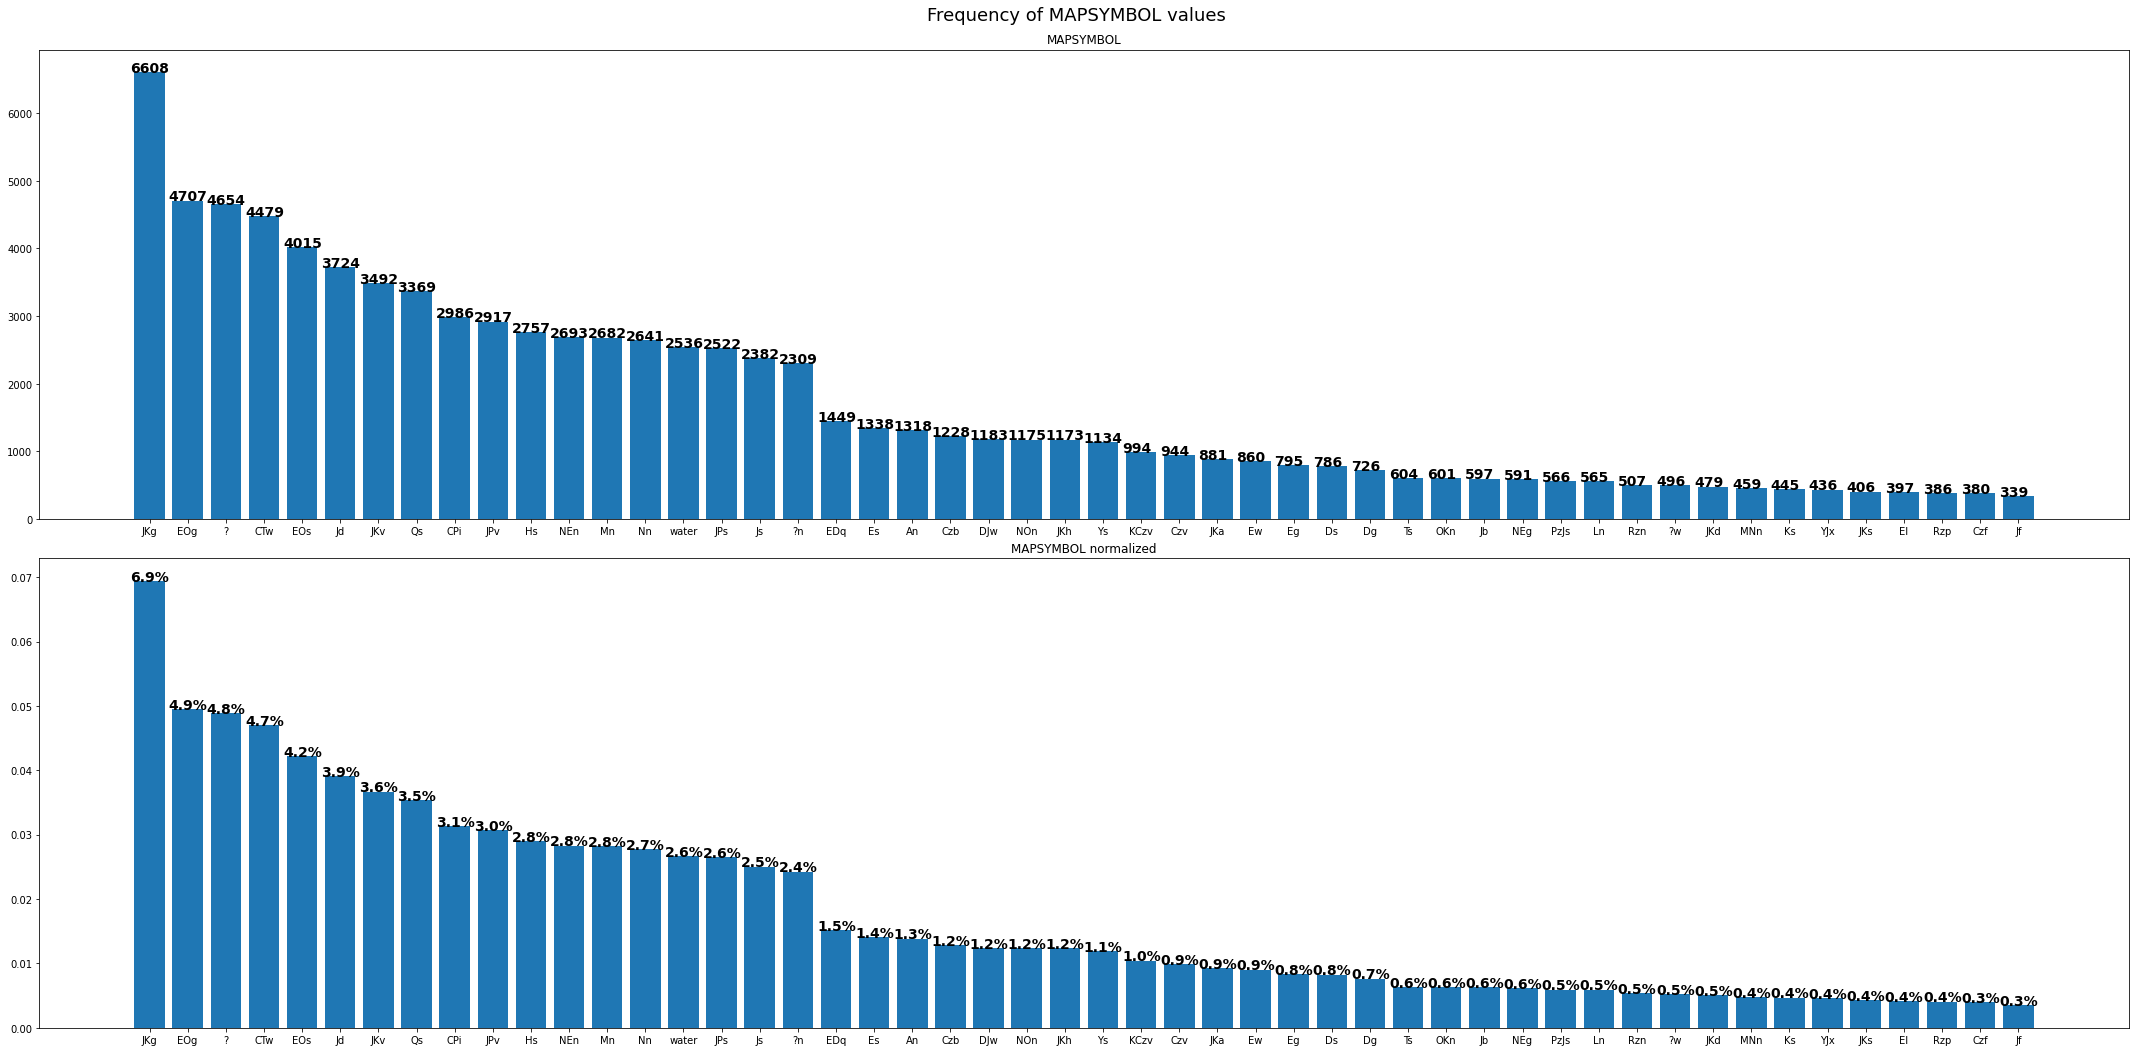

In [6]:
plot_value_counts("MAPSYMBOL", 50, map_sym_counts, map_sym_counts_norm)

## Now the same for PLOTSYMBOL

In [7]:
plot_sym_counts = data["PLOTSYMBOL"].value_counts(ascending=False)
plot_sym_counts_norm = data["PLOTSYMBOL"].value_counts(ascending=False, normalize=True)

In [8]:
print(plot_sym_counts)

JKg    6608
EOg    4707
?      4654
CTw    4479
EOs    4015
       ... 
Dn        2
Pzq       2
Et        1
Rzh       1
JKj       1
Name: PLOTSYMBOL, Length: 183, dtype: int64


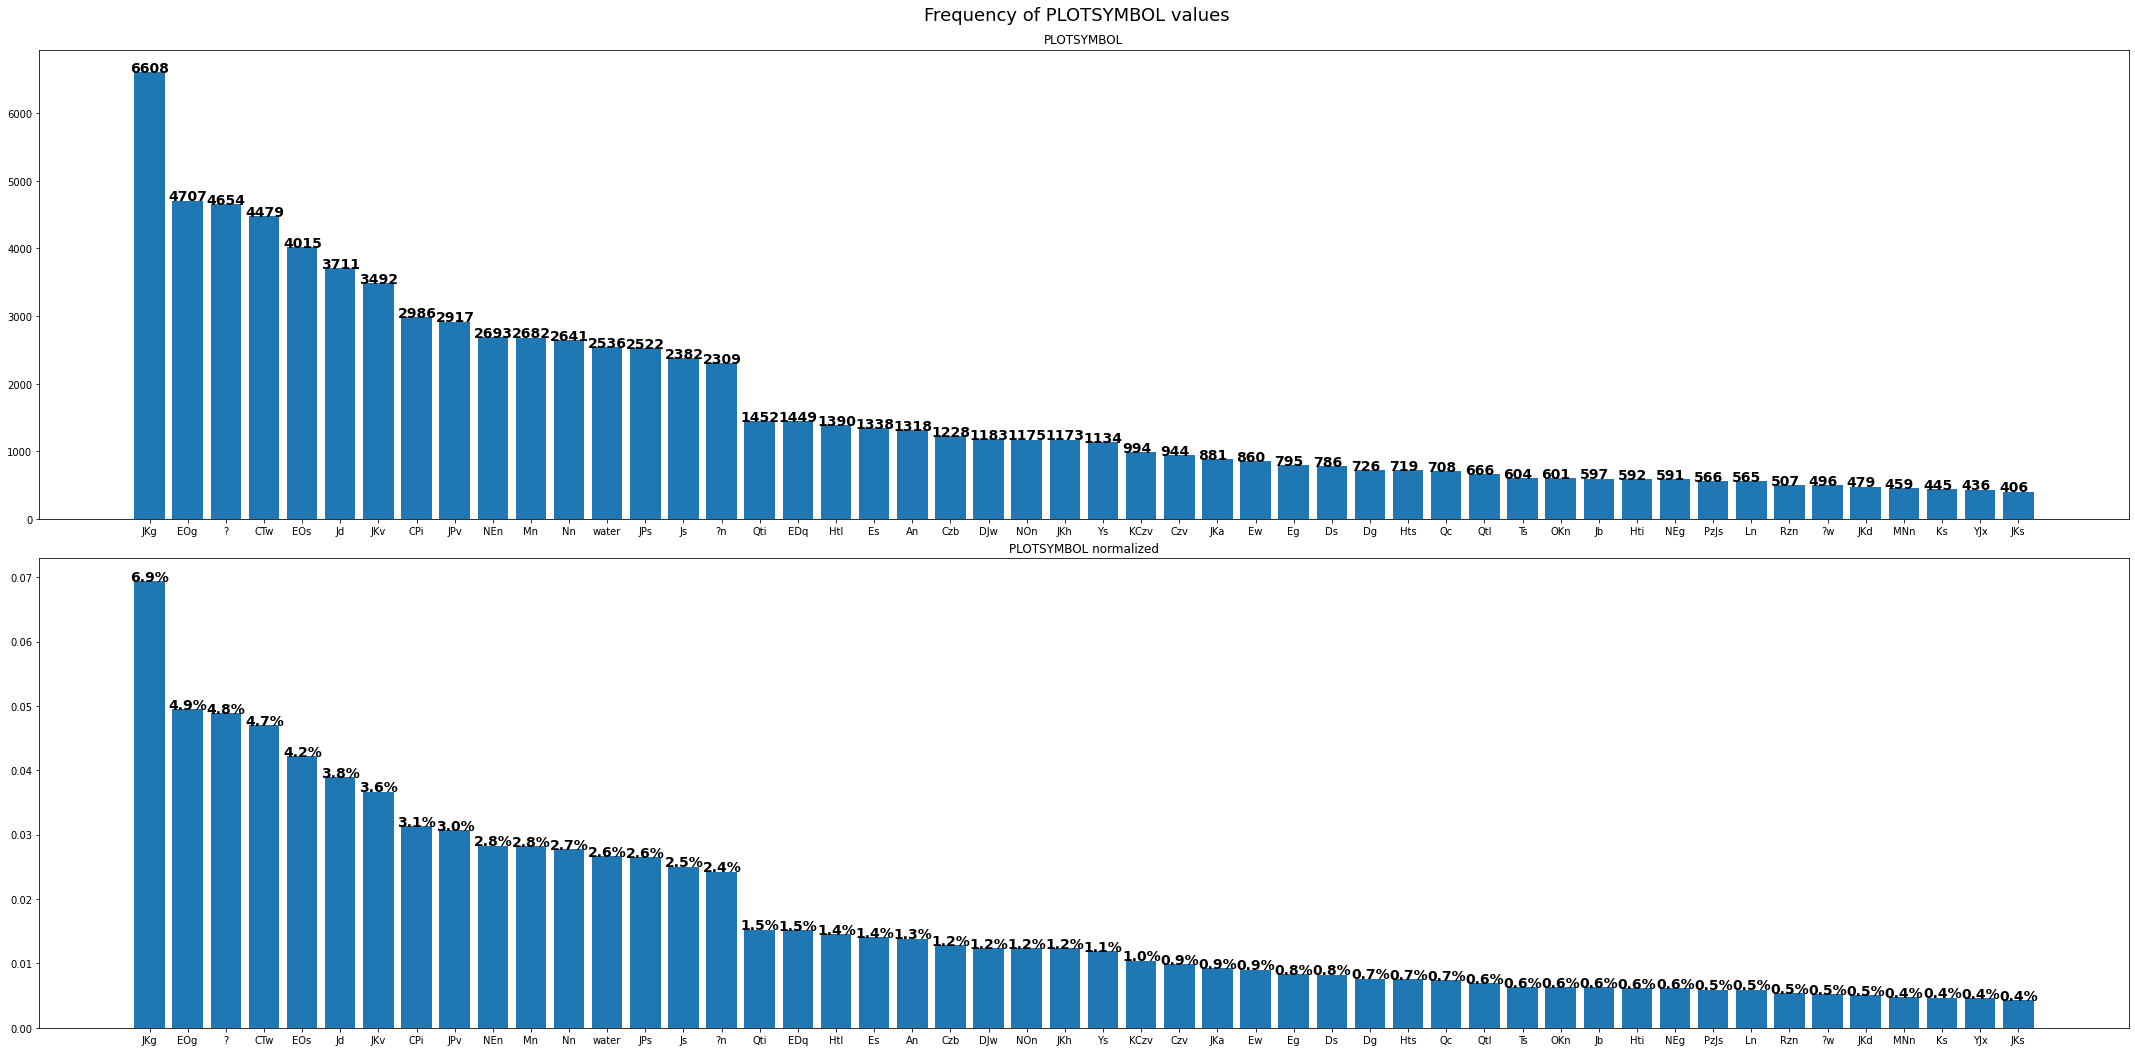

In [9]:
plot_value_counts("PLOTSYMBOL", 50, plot_sym_counts, plot_sym_counts_norm)

## The distribution of these two fields look identical. However, plotsymbol has 10 more values. What explains this discrepancy?

### Let's start by identifying the distinct values.

In [10]:
map_not_plot = sorted([i for i in map_sym_counts.index if i not in plot_sym_counts.index])
plot_not_map = sorted([i for i in plot_sym_counts.index if i not in map_sym_counts.index])

In [11]:
display(map_not_plot)
display(plot_not_map)

['Hs', 'Qs']

['Hb', 'Hf', 'Ht', 'Hti', 'Htl', 'Hts', 'Jn', 'Qm', 'Qt', 'Qti', 'Qtl', 'Qu']

#### The prefixes "Q" and "H" respectively refer to Quaternary and Holocene. From the legend included in the data zip, the map symbols Qs and Hs are categories within which the plot symbols with the same first character fall.
Qs (mudstone, siltstone, sandstone, conglomerate): {
- Qti (ice sheet till), 
- Qtl (local till), 
- Qt(till, unspecified),
- Qm (morraine)}

Hs(mudstone, siltstone, sandstone, conglomerate): {
- Htl(local till), 
- Hti(ice sheet till), 
- Ht(till, unspecified)}
- Hts Not sure what Hts is supposed to mean. till would be a subset of s, so unless s has a separate meaning, Hts has redundant coding and should be classified as Ht

### These sets leave out Hb (Mafic to ultramafic volcanic), Hf (felsic volcanic), Jn (high-grade metamorphic), Qu (Mafic to ultramafic intrusives).

#### Starting with Hb let's look at the corresponding map symbol, source, and name of the polygons with this plotsymbol

In [12]:
Hb_records = data[data["PLOTSYMBOL"] == "Hb"][["SOURCECODE", "MAPSYMBOL", "PLOTSYMBOL", "NAME", "SOURCE"]]
print(f"{Hb_records.shape[0]} polygons have PLOTSYMBOL 'Hb'")
display(Hb_records)

44 polygons have PLOTSYMBOL 'Hb'


,SOURCECODE,MAPSYMBOL,PLOTSYMBOL,NAME,SOURCE
54610,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
54662,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
54985,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55006,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55047,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55298,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55325,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55380,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55435,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55461,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."


### We have two different formation names here, one: Holocene beach and stranded marine deposits mapped by Cox, S. C. et. al. and another: Holocene beach and raised marine deposits mapped by a variety of sources.
- These names imply that the plotsymbol's suffix 'b' corresponds to beach. This conflicts with the map symbol schema established by the legend
- Is there a significant difference between stranded marine deposits and raised marine deposits?
- it establishes a precedent of map symbol as a field that is more compositionally descriptive while plot symbol is more lithogenetically descriptive. Is this a desired pattern? Is this a pattern that is consistent throughout these data? How is this documented/advertised in the schema metadata? 
- Another pattern established in the second group of polys with plotsymbol 'Hb' is that it matches the source code. Is this a desired pattern? is this a consistent pattern? Where is this pattern documented?

### Before examining the schema as a whole, let's focus on making sure there aren't other polygons with this formation name and a different set of symbols and codes

In [13]:
stranded_deposits = data[data["NAME"] == "beach and stranded marine deposits"][["SOURCECODE", "MAPSYMBOL", "PLOTSYMBOL", "NAME", "SOURCE"]]
print(f"{stranded_deposits.shape[0]} polygons have name 'beach and stranded marine deposits'")
display(stranded_deposits)

18 polygons have name 'beach and stranded marine deposits'


,SOURCECODE,MAPSYMBOL,PLOTSYMBOL,NAME,SOURCE
54610,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
54662,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
54985,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55006,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55047,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55298,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55325,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55380,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55435,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55461,ub,Hs,Hb,beach and stranded marine deposits,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."


#### These polygons are all consistent. Let's check 'Holocene beach and raised marine deposits'

In [14]:
raised_marine_deposits = data[data["NAME"] == "Holocene beach and raised marine deposits"][["SOURCECODE", "MAPSYMBOL", "PLOTSYMBOL", "NAME", "SOURCE"]]
print(f"{raised_marine_deposits.shape[0]} polygons have name 'Holocene beach and raised marine deposits'")
display(raised_marine_deposits)

26 polygons have name 'Holocene beach and raised marine deposits'


,SOURCECODE,MAPSYMBOL,PLOTSYMBOL,NAME,SOURCE
61597,Hb,Hs,Hb,Holocene beach and raised marine deposits,Ellerman & Kyle 1990
70673,Hb,Hs,Hb,Holocene beach and raised marine deposits,Pertusati et al. 2012
71055,Hb,Hs,Hb,Holocene beach and raised marine deposits,Baroni & Ombrelli 1994
71062,Hb,Hs,Hb,Holocene beach and raised marine deposits,Baroni & Ombrelli 1994
71064,Hb,Hs,Hb,Holocene beach and raised marine deposits,Baroni & Ombrelli 1994
71066,Hb,Hs,Hb,Holocene beach and raised marine deposits,Baroni & Ombrelli 1994
71068,Hb,Hs,Hb,Holocene beach and raised marine deposits,Baroni & Ombrelli 1994
71130,Hb,Hs,Hb,Holocene beach and raised marine deposits,Pertusati et al. 2012
71133,Hb,Hs,Hb,Holocene beach and raised marine deposits,Baroni & Ombrelli 1994
71221,Hb,Hs,Hb,Holocene beach and raised marine deposits,Pertusati et al. 2012


### I think we can safely say that Hb is used consistently as a PLOTSYMBOL for these two formations

## Let's checkout Hf next

In [15]:
hf_records = data[data["PLOTSYMBOL"] == "Hf"][["SOURCECODE", "MAPSYMBOL", "PLOTSYMBOL", "NAME", "SOURCE"]]
print(f"{hf_records.shape[0]} polygons with PLOTSYMBOL Hf")
display(hf_records)

6 polygons with PLOTSYMBOL Hf


,SOURCECODE,MAPSYMBOL,PLOTSYMBOL,NAME,SOURCE
69982,Hf,Hs,Hf,Holocene fan,GeoMAP
73292,Hf,Hs,Hf,Holocene fan,GeoMAP
73294,Hf,Hs,Hf,Holocene fan,GeoMAP
73297,Hf,Hs,Hf,Holocene fan,GeoMAP
73298,Hf,Hs,Hf,Holocene fan,GeoMAP
73300,Hf,Hs,Hf,Holocene fan,GeoMAP


## This looks pretty straightforward: Hf follows the pattern of plotsymbol being more lithogenetically descriptive and would fit under MAPSYMBOL Hs, but still conficts with the legend suffix for felsic volcanic.

## Moving on to plotsymbol "Jn". Based upon the pattern of mapsymbols, "Jn" should refer to Jurassic age rocks (J) that are high-grade metamorphics (n). This plot/mapsymbol is not included in the legend.
Let's see how many polygons have this PLOTSYMBOL and what their mapsymbol is

In [16]:
jn_records = data[data["PLOTSYMBOL"] == "Jn"][["SOURCECODE", "MAPSYMBOL", "PLOTSYMBOL", "NAME", "SOURCE"]]
print(f"{jn_records.shape[0]} polygons have plotsymbol 'jn'")
display(jn_records)
print(f"{len(data[data['NAME'] == 'Ruppert Coast gabbro'])} polygons have the name Ruppert Coast gabbro")

13 polygons have plotsymbol 'jn'


,SOURCECODE,MAPSYMBOL,PLOTSYMBOL,NAME,SOURCE
41772,Jgab,Jd,Jn,Ruppert Coast gabbro,Metcalfe et al. 1978
41778,Jgab,Jd,Jn,Ruppert Coast gabbro,Metcalfe et al. 1978
41780,Jgab,Jd,Jn,Ruppert Coast gabbro,Metcalfe et al. 1978
41858,Jgab,Jd,Jn,Ruppert Coast gabbro,Metcalfe et al. 1978
41859,Jgab,Jd,Jn,Ruppert Coast gabbro,Metcalfe et al. 1978
41878,Jgab,Jd,Jn,Ruppert Coast gabbro,Metcalfe et al. 1978
41885,Jgab,Jd,Jn,Ruppert Coast gabbro,Metcalfe et al. 1978
41887,Jgab,Jd,Jn,Ruppert Coast gabbro,Metcalfe et al. 1978
41888,Jgab,Jd,Jn,Ruppert Coast gabbro,Metcalfe et al. 1978
41889,Jgab,Jd,Jn,Ruppert Coast gabbro,Metcalfe et al. 1978


13 polygons have the name Ruppert Coast gabbro


### The source should be checked for these polygons. All of the polgyons labeled as "Ruppert Coast gabbro" are mapped by Metcalfe et al. 1978. If the source indicates the formation is mafic (d) (as gabbro would suggest), the plot symbol should be changed. If the formation is metamorphic, the map symbol should be changed.

#### There is also the possibility that the combination of map symbol and plot symbol is suggesting that the formation is a metamorphosed gabbro.

## Finally, Qu

In [17]:
qu_records = data[data["PLOTSYMBOL"] == "Qu"][["SOURCECODE", "MAPSYMBOL", "PLOTSYMBOL", "NAME", "SOURCE"]]
print(f"{qu_records.shape[0]} polygons have plotsymbol 'jn'")
display(qu_records)

123 polygons have plotsymbol 'jn'


,SOURCECODE,MAPSYMBOL,PLOTSYMBOL,NAME,SOURCE
55299,ue,Qs,Qu,deltaic deposit,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55351,uf,Qs,Qu,fan deposit,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55355,ue,Qs,Qu,deltaic deposit,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55433,uf,Qs,Qu,fan deposit,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
55453,uf,Qs,Qu,fan deposit,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
...,...,...,...,...,...
58821,uf,Qs,Qu,fan deposit,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
58861,uf,Qs,Qu,fan deposit,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
60703,ua,Qs,Qu,alluvium,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."
60727,ua,Qs,Qu,alluvium,"Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse..."


### This is a relatively large number of polygons with a few different names represented. Let's look at their frequency

In [18]:
display(qu_records["NAME"].value_counts())

fan deposit                       80
deltaic deposit                   22
alluvium                          11
dune sand and aeolian deposits     7
cover - undifferentiated           2
cover - lacustrine deposit?        1
Name: NAME, dtype: int64

### I'm guessing that Qu is meant to indicate "quaternary unknown or undifferentiated"
- u should probably not be used to indicate mafic to ultramafic intrusives.
- these fan deposit polys should probably have plotsymbol "Qf"
- perhaps there's a need for a separate legend or at least glossary for plotsymbol values.

## Are there other plotsymbols that do not conform to the legend? How would we find these?

## Going off on another direction, based upon the legend, mapsymbol values should have lengths between 2 and 3 characters. Do the data conform to this expectation?

In [19]:
map_sym_len_counts = pd.DataFrame([len(i) for i in map_sym_counts.index]).value_counts()
display(map_sym_len_counts)

2    84
3    78
4     9
5     1
1     1
dtype: int64

### All but 11 conform. What values are these?

In [20]:
map_sym_len_anomalies = [i for i in map_sym_counts.index if len(i) not in [2, 3]]
print(map_sym_len_anomalies)

['?', 'water', 'KCzv', 'PzJs', 'ARzn', 'PzTn', 'ARzx', 'RzEn', 'PzTs', 'RzEg', 'ARzg']


### after looking at the legend again, 4 character symbols work for units that span from an era into a period.
#### water and ? are self explanatory.
## There seem to be no MAPSYMBOL length anomalies

## Let's look at PLOTSYMBOL lengths

In [21]:
plot_sym_len_counts = pd.DataFrame([len(i) for i in plot_sym_counts.index]).value_counts()
display(plot_sym_len_counts)

2    89
3    83
4     9
5     1
1     1
dtype: int64

#### the 5 and 1 are likely water and ? again. Let's look at the 4 character symbols

In [22]:
plot_sym_len_anomalies = [i for i in plot_sym_counts.index if len(i) == 4]
pp.pp(plot_sym_len_anomalies)

['KCzv', 'PzJs', 'ARzn', 'PzTn', 'ARzx', 'RzEn', 'PzTs', 'RzEg', 'ARzg']


## These match the MAPSYMBOLs with 4 characters.

# Let's look at how many source codes are represented by each mapsymbol

In [42]:
map_sym_src_code_vals = sorted([data[data["MAPSYMBOL"] == i][["MAPSYMBOL", "SOURCECODE", "SOURCE", "NAME", "DESCR"]].drop_duplicates("SOURCECODE") for i in map_sym_counts.index], key=lambda x: len(x), reverse=True)
map_sym_src_code_counts = pd.DataFrame([(i["MAPSYMBOL"].unique()[0], len(i)) for i in map_sym_src_code_vals])

In [43]:
display(map_sym_src_code_counts)

,0,1
0,Qs,43
1,Eg,42
2,Czb,38
3,NEn,35
4,Nn,34
...,...,...
168,Qk,1
169,Cn,1
170,Rzh,1
171,Et,1


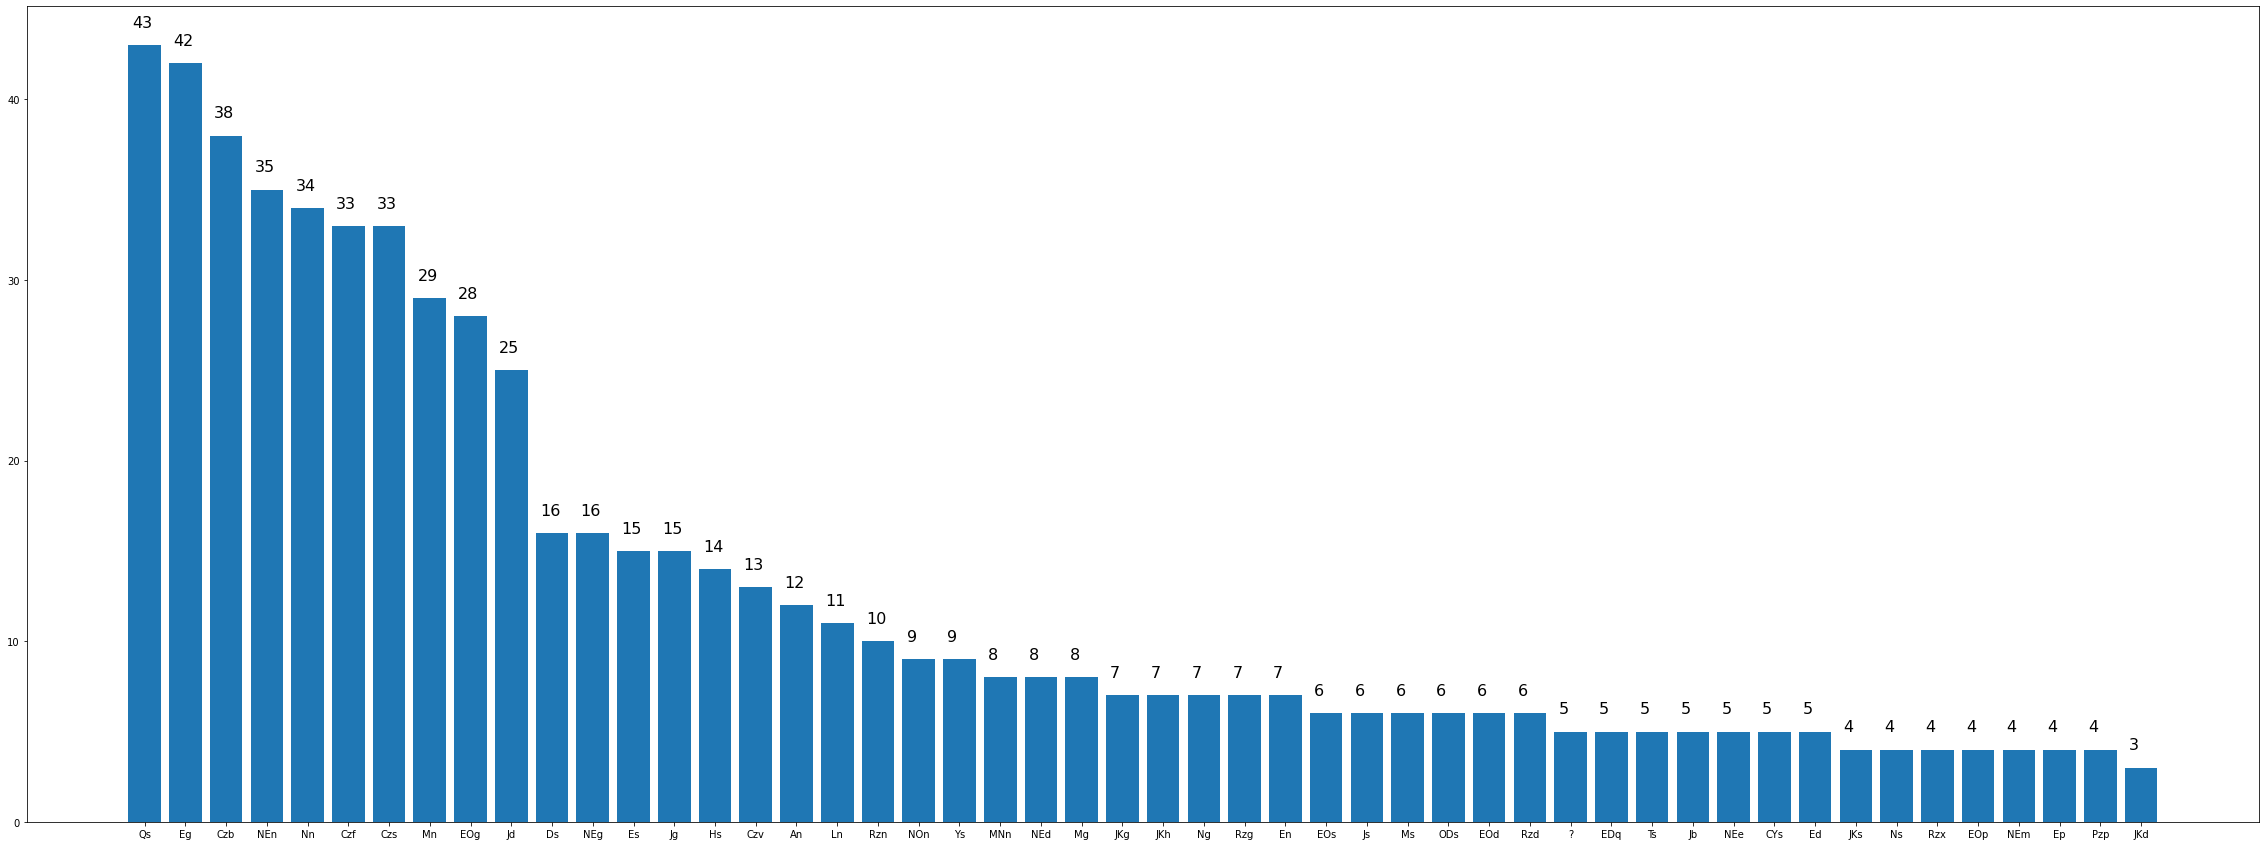

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(40, 15))
ax.bar(map_sym_src_code_counts[:50][0],map_sym_src_code_counts[:50][1])
for i, v in enumerate(map_sym_src_code_counts[:50][1]):
    ax.text(i - .3, v + 1, v, fontsize=16)

### Not really sure if plotting the lower half of the values is useful

#### 10 values with at least 25 sourcecodes each is a lot. It could be interesting to look at the source codes for each to see what sort of variety is present. Do they represent rock types that can be easily classified in a more granular manner? Are there formations that have been studied over a long period of time or by multiple research groups that use different conventions? 

### Let's look at Qsand Md's codes just for the fun of it

In [45]:
pp.pp(map_sym_src_code_vals[0])
pp.pp(map_sym_src_code_vals[1])

      MAPSYMBOL SOURCECODE                                             SOURCE  \
39753        Qs        Qtl                                             GeoMAP   
40463        Qs        Qti                                             GeoMAP   
40797        Qs         Qc                                             GeoMAP   
41367        Qs         Qt                                             GeoMAP   
43686        Qs       Qti2                              Grindley & Laird 1969   
43852        Qs        Quc                              Grindley & Laird 1969   
43875        Qs       Qti3                                    Joy et al. 2014   
43885        Qs       Qti4                                 Storey et al. 2010   
54457        Qs         ui  Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse...   
54478        Qs         uc  Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse...   
54493        Qs         ut  Cox, S.C.; Turnbull, I.M.; Isaac, M.J.; Townse...   
54552        Qs         uk  

#### On the QS side of things, there are a lot of different types of cover that all have their own source code. This makes sense as quaternary geology is a thoroughly studied subject on the continent

#### on the Eg side of things, there are a large number of plutons mapped with coloquial names and each have their own unstandardized sourcecode

## IN SUMMARY:
- MAPSYMBOL and PLOTSYMBOL have very similar formats but their values mean different things (MAPSYMBOL corresponds directly with the provided legend whereas PLOTSYMBOL does not) This may be confusing to researchers new to the GeoMap project/dataset
- both fields have values that have been standardized and there are no formatting anomalies.
- Several MAPSYMBOLS represent a large number of SOURCECODES. This may be a proxy for the amount of research interest into these ages and lithologies over the course of Antarctic exploration